**Aim : To correct the noisy labels of the images and then training the correctly labelled dataset. Further evaluating the model on MNIST and conclude the observation**

Mounting Drive and connecting to colab to access the saved ".npy" files of images and labels.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Essential Imports

In [1]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint
import os
from pathlib import Path 
import shutil
from tensorflow.keras.models import load_model
from keras.preprocessing import image
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import *
from google.colab import files
from IPython.display import Image

Loading saved ".npy" files of images and labels

In [ ]:
images = np.load("/content/drive/MyDrive/task3images.npy")

labels = np.load("/content/drive/MyDrive/task3labels.npy")

In [ ]:
print(images.shape, labels.shape)

(60000, 28, 28, 1) (60000,)


In [ ]:
labels =to_categorical(labels)

**LABEL CORRECTION**

**To correct the labels, following approach has been implemented.**
>**Approach is** - To use the model which was randomly initialised and trained on mnist dataset in part 2 of Task 2.
This model will be used to evaluate on the noisy labelled data of part 3.Further from that prediction, the class(0-9) to which this each image has highest probability is chosen as the most appropriate label by me. 




Loading trained model on mnist.

In [ ]:
from tensorflow.keras.models import load_model 
filepath = "mnist_randomInit.h5"
loaded_model = load_model(
    filepath,
    custom_objects=None,
    compile=True
)

Prediction made on images using loaded model

In [ ]:
prediction = loaded_model.predict(images)

**Below is the probabilities shown of every image to fall in the 9 classes. The highest probability class for every image  is the most correct label.**

In [ ]:
print(prediction)

[[9.99937177e-01 3.60167235e-07 9.62222202e-06 ... 1.35531025e-06
  1.31912918e-06 4.78170368e-05]
 [2.42365710e-03 9.73129630e-01 1.25459181e-02 ... 4.31724999e-04
  2.46477127e-03 1.71529064e-05]
 [6.88055516e-05 9.99176800e-01 2.00561713e-04 ... 1.08291133e-04
  7.06605279e-05 1.19363658e-05]
 ...
 [2.66736661e-05 3.92312174e-08 3.65490171e-09 ... 2.55844998e-11
  1.21032812e-07 4.05628739e-08]
 [3.21328262e-05 1.78852770e-03 2.02295603e-03 ... 9.91578579e-01
  3.55621305e-05 4.15982399e-03]
 [2.00779538e-14 5.07790153e-13 7.55843654e-09 ... 1.63035221e-08
  2.85750368e-10 1.30888885e-11]]


In [ ]:
prediction = np.array(prediction)

It can be clearly seen that the 1 image of 60000 images has highest probability(9.7312963e-01) to fall in class 1 - i.e. it would be an image of 1  

In [ ]:
prediction[1]

array([2.4236571e-03, 9.7312963e-01, 1.2545918e-02, 1.7557750e-05,
       7.3396643e-03, 2.0171407e-04, 1.4281193e-03, 4.3172500e-04,
       2.4647713e-03, 1.7152906e-05], dtype=float32)

Plotting the image to be sure.

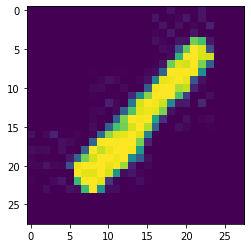

In [ ]:
plt.imshow(images[1].reshape(28,28))

**Making Correct labels by selecting the classes through argmax fun()**
> The correct labels are saved as ".npy" file to be used for training a model 



In [ ]:
y_classes = prediction.argmax(axis=-1)

In [ ]:
y_classes=np.array(y_classes)

In [ ]:
np.save("/content/drive/MyDrive/y_classes.npy",y_classes)

In [ ]:
y_classes =to_categorical(y_classes)

In [ ]:
y_classes.shape

(60000, 10)

**Introducing a model with simple architecture of 3 hidden layers and a dense layer at the end with reasonable filters and filter size.**

In [ ]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , activation = 'relu' , input_shape =(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64 , (3,3),activation ='relu'  ))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(32,(3,3) , activation= 'relu' ))
model.add(MaxPool2D((2,2)))
 
 
model.add(Flatten())
 
model.add(Dense (10 ,activation ='softmax'))

**Compiling and Training the label corrected dataset and saving model checkpoints**  

In [ ]:
model.compile(optimizer='adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [ ]:
checkpoint = ModelCheckpoint("best_model.h5" , monitor ='val_accuracy' ,verbose =0 , save_best_only =True , save_weights_only =False, mode='auto', period=1 )



In [ ]:
model.fit(images ,y_classes,validation_split =0.1, epochs = 25 , batch_size=16, callbacks=[checkpoint])

Epoch 1/25
3375/3375 [==============================] - 62s 18ms/step - loss: 0.4134 - accuracy: 0.8688 - val_loss: 0.0796 - val_accuracy: 0.9753
Epoch 2/25
3375/3375 [==============================] - 59s 18ms/step - loss: 0.0708 - accuracy: 0.9758 - val_loss: 0.0488 - val_accuracy: 0.9857
Epoch 3/25
3375/3375 [==============================] - 60s 18ms/step - loss: 0.0472 - accuracy: 0.9840 - val_loss: 0.0471 - val_accuracy: 0.9845
Epoch 4/25
3375/3375 [==============================] - 60s 18ms/step - loss: 0.0358 - accuracy: 0.9880 - val_loss: 0.0401 - val_accuracy: 0.9858
Epoch 5/25
3375/3375 [==============================] - 60s 18ms/step - loss: 0.0264 - accuracy: 0.9911 - val_loss: 0.0381 - val_accuracy: 0.9870
Epoch 6/25
3375/3375 [==============================] - 60s 18ms/step - loss: 0.0215 - accuracy: 0.9927 - val_loss: 0.0330 - val_accuracy: 0.9893
Epoch 7/25
3375/3375 [==============================] - 60s 18ms/step - loss: 0.0198 - accuracy: 0.9927 - val_loss: 0.0351 -

Importing MNIST and preprocessing it

In [ ]:
from keras.datasets import mnist

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
def preprocess(x,y):
  x=x.reshape((-1,28,28,1))
  x = x/255.0
  y =to_categorical(y)
  return x, y
  

In [ ]:
(x_train,y_train) = preprocess(x_train, y_train)

In [ ]:
(x_test,y_test) = preprocess(x_test,y_test)

Shuffling the MNIST dataset 

In [ ]:
def shuffle_in_unison(a, b):
    assert len(a) == len(b)
    shuffled_a = np.empty(a.shape, dtype=a.dtype)
    shuffled_b = np.empty(b.shape, dtype=b.dtype)
    permutation = np.random.permutation(len(a))
    for old_index, new_index in enumerate(permutation):
        shuffled_a[new_index] = a[old_index]
        shuffled_b[new_index] = b[old_index]
    return shuffled_a, shuffled_b

**Evaluating the performance of above trained model on MNIST** 

In [ ]:
model.evaluate(x_train,y_train)

1875/1875 [==============================] - 19s 10ms/step - loss: 0.0966 - accuracy: 0.9909


[0.09662701189517975, 0.9909499883651733]

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.1222 - accuracy: 0.9861


[0.12224825471639633, 0.9861000180244446]

The evaluation of MNIST on random Initialised model can be taken from subtask 2 which is given below



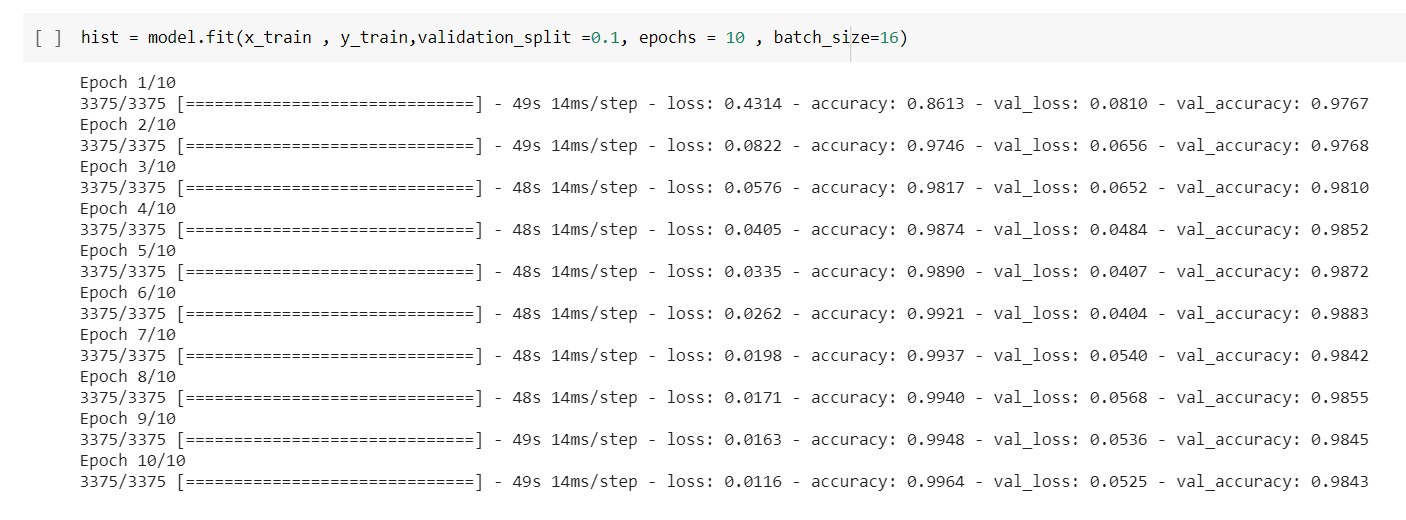

In [4]:
Image("images9.PNG" , width =1200)

**Observation : There is minor difference in the validation accuracies and validation loss is just half in case of randomly initialised model.**


> **Conclusion : Randomly initialised model on mnist performs  better a little bit because it is more generalised on MNIST rather than the pretrained on another dataset.**


 